In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.animation import FuncAnimation
from IPython.display import Video, HTML
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits import mplot3d

from skimage import io
from matplotlib import image as mpimg
from PIL import Image

import scipy.integrate as integrate
import scipy.special as special
from statistics import mean
import scipy.stats as stats
from datetime import datetime
from sklearn import datasets

In [2]:
tau_x_2011 = '~/NOAA Work/Wind stress Data/Zonal/taux_tropflux_1m_2011.nc'
tau_x_2011 = xr.open_dataset(tau_x_2011)
#tau_y_2010 = tau_y_2010.coarsen(longitude=4, latitude=4, boundary="trim").mean()
#tau_y_2010.to_netcdf('~/NOAA Work/Wind stress Data/Meridional/tau_y_2010.nc')
tau_x_2011

<xarray.Dataset>
Dimensions:    (time: 12, latitude: 60, longitude: 350)
Coordinates:
  * longitude  (longitude) float32 30.5 31.5 32.5 33.5 ... 377.5 378.5 379.5
  * latitude   (latitude) float32 -29.5 -28.5 -27.5 -26.5 ... 27.5 28.5 29.5
  * time       (time) datetime64[ns] 2011-01-15T00:00:00.000080384 ... 2011-1...
Data variables:
    taux       (time, latitude, longitude) float32 ...
Attributes:
    source:           TropFlux - Momentum Fluxes for the Global Tropical Oceans
    methodology:      Praveen Kumar et al., Clim. Dyn 2013
    producer_agency:  Joint research colloboration between INCOIS(India), NIO...
    timerange:        20110115 - 20111215
    creation_date:    20140321
    website:          www.incois.gov.in/tropflux/

In [3]:
tau_y_2010 = '~/NOAA Work/Wind stress Data/Meridional/tauy_tropflux_1d_2010.nc'
tau_y_2010 = xr.open_dataset(tau_y_2010)
tau_y_2010

<xarray.Dataset>
Dimensions:    (time: 365, latitude: 60, longitude: 350)
Coordinates:
  * longitude  (longitude) float32 30.5 31.5 32.5 33.5 ... 377.5 378.5 379.5
  * latitude   (latitude) float32 -29.5 -28.5 -27.5 -26.5 ... 27.5 28.5 29.5
  * time       (time) datetime64[ns] 2010-01-01T11:59:59.999959808 ... 1950-0...
Data variables:
    tauy       (time, latitude, longitude) float32 ...
Attributes:
    source:           TropFlux - Momentum Fluxes for the Global Tropical Oceans
    methodology:      Praveen Kumar et al., Clim. Dyn 2013
    producer_agency:  Joint research colloboration between INCOIS(India), NIO...
    timerange:        20100101 - 20101231
    creation_date:    20140121
    website:          www.incois.gov.in/tropflux/ or http://www.locean-ipsl.u...

In [4]:
tau_x_2009d = '~/NOAA Work/Wind stress Data/Zonal/taux_tropflux_1d_2009.nc'
tau_x_2009d = xr.open_dataset(tau_x_2009d)

tau_x_2011d = '~/NOAA Work/Wind stress Data/Zonal/taux_tropflux_1d_2011.nc'
tau_x_2011d = xr.open_dataset(tau_x_2011d)

tau_x_2012d = '~/NOAA Work/Wind stress Data/Zonal/taux_tropflux_1d_2012.nc'
tau_x_2012d = xr.open_dataset(tau_x_2012d)

tau_x_2013d = '~/NOAA Work/Wind stress Data/Zonal/taux_tropflux_1d_2013.nc'
tau_x_2013d = xr.open_dataset(tau_x_2013d)

tau_x_2010d = '~/NOAA Work/Wind stress Data/Zonal/taux_tropflux_1d_2010.nc'
tau_x_2010d = xr.open_dataset(tau_x_2010d)

tauxd = [[tau_x_2009d], [tau_x_2010d], [tau_x_2011d], [tau_x_2012d], [tau_x_2013d]]
tauxd = xr.combine_nested(tauxd, concat_dim = ['time', None])
tauxd

dataset = tauxd
%store dataset

Stored 'dataset' (Dataset)


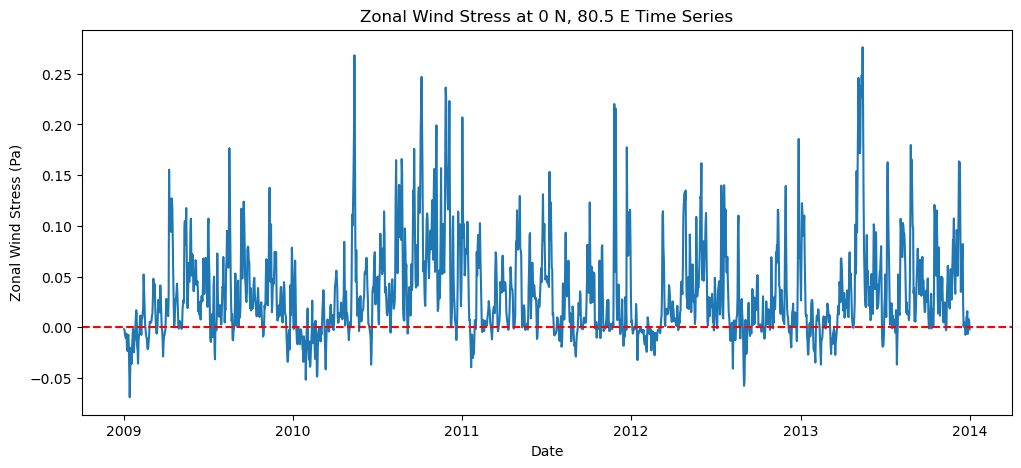

In [5]:
tauxd_0 = tauxd.isel(longitude = 50, latitude = 30)
plt.figure(figsize=(12, 5)) 
plt.plot(tauxd_0['time'], tauxd_0['taux'])
plt.axhline(y=0, color = 'r', ls = '--')
plt.xlabel('Date')
plt.ylabel('Zonal Wind Stress (Pa)')
plt.title('Zonal Wind Stress at 0 N, 80.5 E Time Series')
plt.savefig('Zonal_Wind_Stress_Time_Series_0N_80.5E.pdf')

In [18]:
tau = tauxd_0['taux']
lag = 1
x = tau[:-lag]
y = tau[lag:]

R = np.corrcoef(x, y)
print(R)

[[1.         0.84535614]
 [0.84535614 1.        ]]


In [19]:
lags = np.arange(1, int(len(tau)/4))
R = np.empty(len(lags))

In [20]:
for i, k in enumerate(lags):
    x = tau[:-k]
    y = tau[k:]
    R[i] = np.corrcoef(x, y)[0][1]

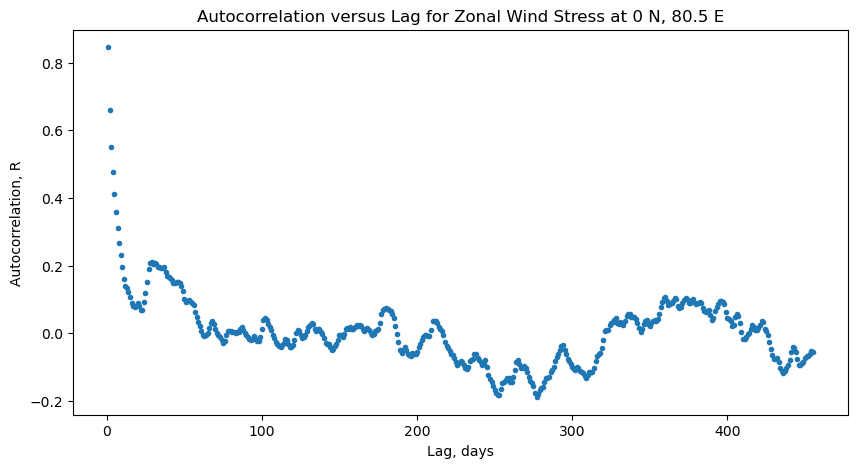

In [23]:
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(lags, R, '.')
ax.set_ylabel('Autocorrelation, R')
ax.set_xlabel('Lag, days')
ax.set_title('Autocorrelation versus Lag for Zonal Wind Stress at 0 N, 80.5 E');

In [6]:
import matplotlib as mpl
x = mpl.dates.date2num(tauxd_0['time'])
y = tauxd_0['taux']


In [44]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)

print('B0 : {}'.format(np.round(intercept,4)))
print('B1 : {}'.format(np.round(slope,4)))

print('R^2 : {}'.format(np.round(rvalue**2,3)))
print('R : {}'.format(np.round(rvalue,3)))
print('stderr : {}'.format(np.round(stderr,5)))

B0 : -0.045
B1 : 0.0
R^2 : 0.004
R : 0.06
stderr : 0.0


In [41]:
# Compute the SST for x
sst_x = np.sum( (x - np.mean(x))**2 )

# Compute the standard error
sigma = stderr * np.sqrt(sst_x)
print('sigma : {}'.format(np.round(sigma,3)))

sigma : 0.046


In [42]:
y_predicted = B0 + B1*x
residuals = (y - y_predicted)

ValueError: dimensions () must have the same length as the number of data dimensions, ndim=1

Text(0, 0.5, 'Zonal Wind Stress (Pa)')

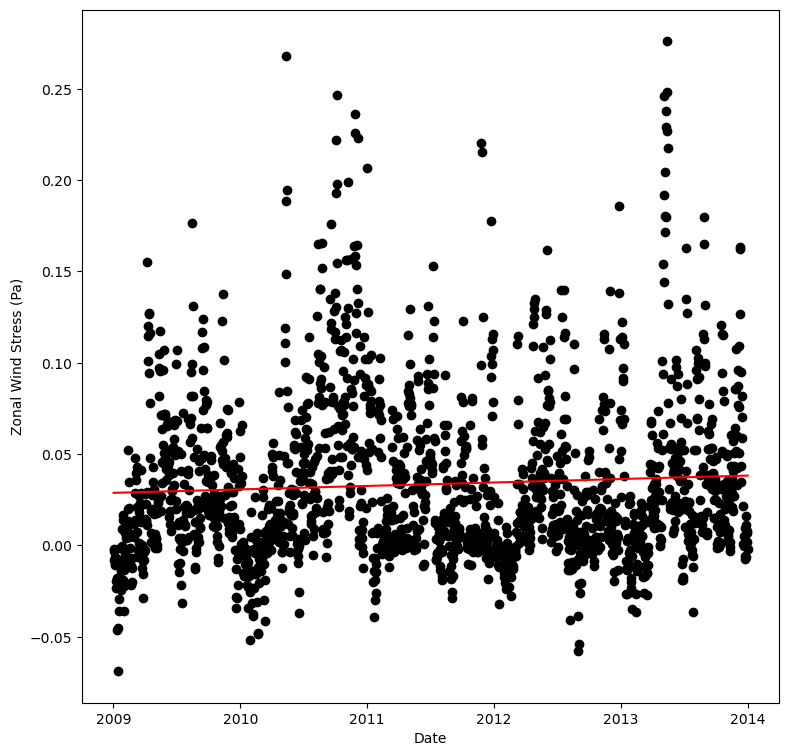

In [43]:
fig, ax = plt.subplots(figsize=(9,9))

# Scatterplot
plt.scatter(x= tauxd_0['time'], y= tauxd_0['taux'], c='k');

# Create points for the regression line
x_r = np.linspace(x.min(), x.max(), 2) # make two x coordinates from min and max values of SLI_max
y_r = slope * x_r + intercept # y coordinates using the slope and intercept from our linear regression to draw a regression line

# Plot the regression line
ax.plot(x_r, y_r, '-r')

ax.set_xlabel('Date')
ax.set_ylabel('Zonal Wind Stress (Pa)')


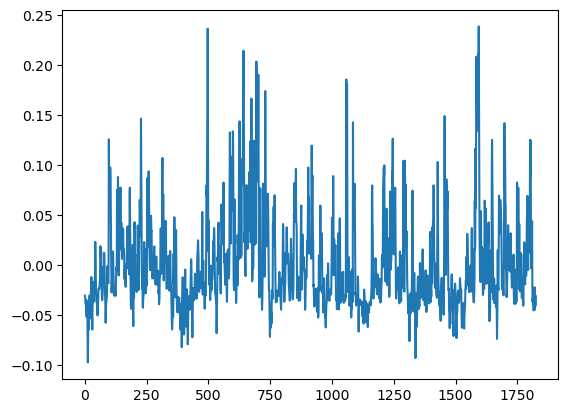

In [53]:
pred = slope * x + intercept
noise = (y - pred)
plt.plot(noise)


(array([353., 384., 436., 303., 126.,  65.,  51.,  33.,  21.,   5.,  14.,
          8.,   5.,   5.,   2.,   6.,   3.,   4.,   0.,   2.]),
 array([1.63117917e-05, 1.19649441e-02, 2.39135763e-02, 3.58622086e-02,
        4.78108408e-02, 5.97594731e-02, 7.17081054e-02, 8.36567376e-02,
        9.56053699e-02, 1.07554002e-01, 1.19502634e-01, 1.31451267e-01,
        1.43399899e-01, 1.55348531e-01, 1.67297163e-01, 1.79245796e-01,
        1.91194428e-01, 2.03143060e-01, 2.15091693e-01, 2.27040325e-01,
        2.38988957e-01]),
 <BarContainer object of 20 artists>)

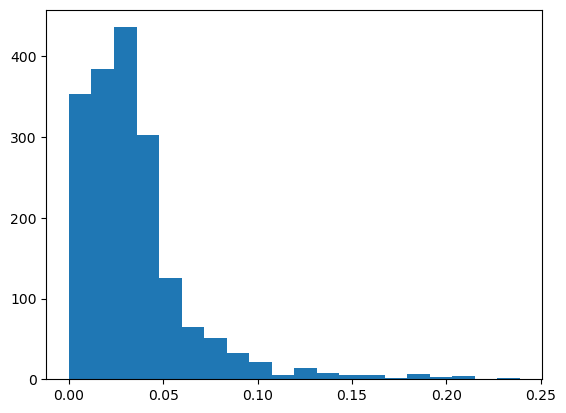

In [52]:
plt.hist(noise, bins = 20)

In [6]:
tau_y_2010 = tau_y_2010.sortby("time")
tau_y_2010 = tau_y_2010.sel(time=slice("2009-01-01", "2011-12-31"))
tau_y_2010

<xarray.Dataset>
Dimensions:    (time: 274, latitude: 60, longitude: 350)
Coordinates:
  * longitude  (longitude) float32 30.5 31.5 32.5 33.5 ... 377.5 378.5 379.5
  * latitude   (latitude) float32 -29.5 -28.5 -27.5 -26.5 ... 27.5 28.5 29.5
  * time       (time) datetime64[ns] 2010-01-01T11:59:59.999959808 ... 2010-1...
Data variables:
    tauy       (time, latitude, longitude) float32 ...
Attributes:
    source:           TropFlux - Momentum Fluxes for the Global Tropical Oceans
    methodology:      Praveen Kumar et al., Clim. Dyn 2013
    producer_agency:  Joint research colloboration between INCOIS(India), NIO...
    timerange:        20100101 - 20101231
    creation_date:    20140121
    website:          www.incois.gov.in/tropflux/ or http://www.locean-ipsl.u...

In [7]:
tau_x_2010 = '~/NOAA Work/Wind stress Data/Zonal/taux_tropflux_1m_2010.nc'
tau_x_2010 = xr.open_dataset(tau_x_2010)

tau_x_2009 = '~/NOAA Work/Wind stress Data/Zonal/taux_tropflux_1m_2009.nc'
tau_x_2009 = xr.open_dataset(tau_x_2009)

tau_x_2012 = '~/NOAA Work/Wind stress Data/Zonal/taux_tropflux_1m_2012.nc'
tau_x_2012 = xr.open_dataset(tau_x_2012)

tau_x_2013 = '~/NOAA Work/Wind stress Data/Zonal/taux_tropflux_1m_2013.nc'
tau_x_2013 = xr.open_dataset(tau_x_2013)

In [15]:
taux = [[tau_x_2009], [tau_x_2010], [tau_x_2011], [tau_x_2012], [tau_x_2013]]
taux = xr.combine_nested(taux, concat_dim = ['time', None])
taux

<xarray.Dataset>
Dimensions:    (time: 60, latitude: 60, longitude: 350)
Coordinates:
  * longitude  (longitude) float32 30.5 31.5 32.5 33.5 ... 377.5 378.5 379.5
  * latitude   (latitude) float32 -29.5 -28.5 -27.5 -26.5 ... 27.5 28.5 29.5
  * time       (time) datetime64[ns] 2009-01-15T00:00:00.000080384 ... 2013-1...
Data variables:
    taux       (time, latitude, longitude) float32 nan -0.01228 ... nan nan

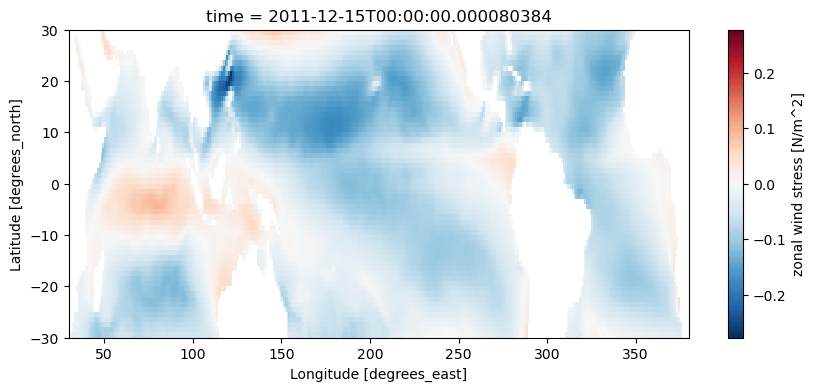

In [5]:
plt.figure(figsize=(10,4))                  #Specify figure size in inches
tau_x_2011.isel(time=-1)['taux'].plot(cmap='RdBu_r') #Plot using in-built xarray tools; isel() selects based on specified indices
#plt.savefig('sst.png')        

Text(0.5, 1.0, 'Zonal Wind Stress at 0 N, 80.5 E Time Series')

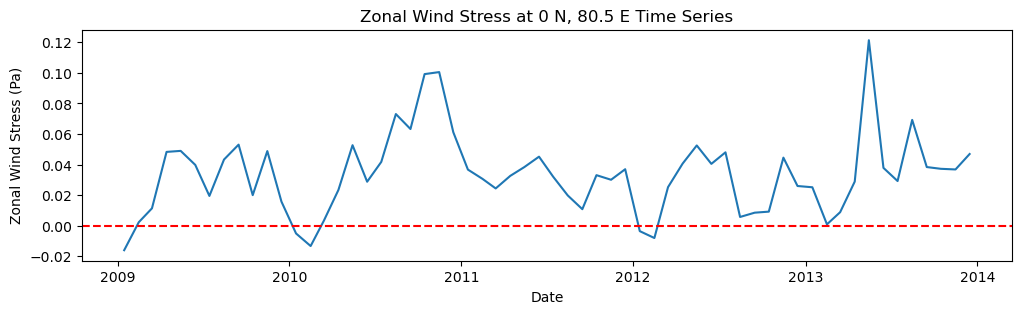

In [20]:
lat = 80.5
lon = 0

taux_0 = taux.isel(longitude = 50, latitude = 30)
plt.figure(figsize=(12, 3)) 
plt.plot(taux_0['time'], taux_0['taux'])
plt.axhline(y=0, color = 'r', ls = '--')
plt.xlabel('Date')
plt.ylabel('Zonal Wind Stress (Pa)')
plt.title('Zonal Wind Stress at 0 N, 80.5 E Time Series')


Text(0.5, 1.0, 'Meridional Wind Stress at 0 N, 80.5 E Time Series')

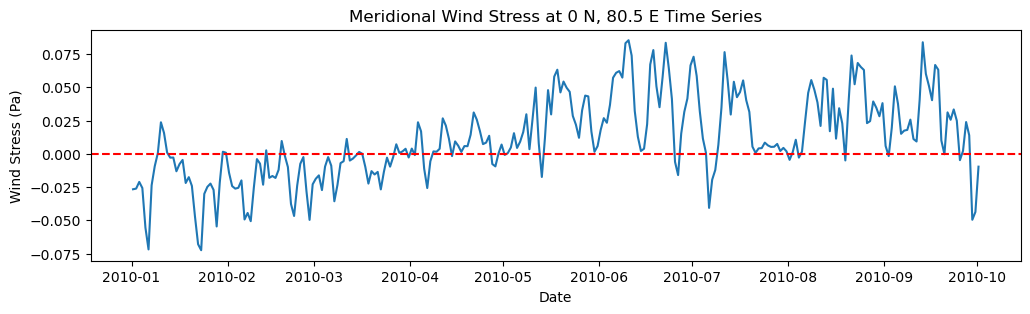

In [8]:
tau_y_2 = tau_y_2010.isel(longitude = 50, latitude = 30)
plt.figure(figsize=(12, 3)) 
plt.plot(tau_y_2['time'], tau_y_2['tauy'])
plt.axhline(y=0, color = 'r', ls = '--')
plt.xlabel('Date')
plt.ylabel('Wind Stress (Pa)')
plt.title('Meridional Wind Stress at 0 N, 80.5 E Time Series')

In [75]:
tau_y_2

<xarray.Dataset>
Dimensions:    (time: 3)
Coordinates:
    longitude  float32 80.5
    latitude   float32 0.5
  * time       (time) datetime64[ns] 2010-01-01T11:59:59.999959808 ... 1950-0...
Data variables:
    tauy       (time) float32 -0.02664 -0.02614 0.0
Attributes:
    source:           TropFlux - Momentum Fluxes for the Global Tropical Oceans
    methodology:      Praveen Kumar et al., Clim. Dyn 2013
    producer_agency:  Joint research colloboration between INCOIS(India), NIO...
    timerange:        20100101 - 20101231
    creation_date:    20140121
    website:          www.incois.gov.in/tropflux/ or http://www.locean-ipsl.u...